# 2 задание по вычислительной математике, вариант 1
### Выполнила: Гришкова Елизавета, группа Б06-801

In [1]:
import math
import matplotlib.pyplot as plt
from matplotlib import mlab
import numpy as np
import scipy as scp
from scipy import optimize
from scipy.integrate import odeint

Напшем функции, реализующие численные методы решения систем ОДУ, необходимые нам для решения задач.

In [2]:
# Явный метод Эйлера
def euler1(n, h, u0, v0):
    t = np.linspace(0.01, n*h , n+1)
    u = np.zeros(n+1)
    v = np.zeros(n+1)
    u[0] = u0
    v[0] = v0
    for i in range(n):
        u[i+1] = u[i] + h * f1(u[i], v[i])
        v[i+1] = v[i] + h * f2(u[i], v[i])
    return t, u, v

# Невный метод Эйлера
def euler2(n, h, u0, v0):
    t = np.linspace(0.01, n*h , n+1)
    u = np.zeros(n+1)
    v = np.zeros(n+1)
    u[0] = u0
    v[0] = v0
    for i in range(n):
        sol = optimize.root(Phi, [u0, v0], args=(u[i], v[i], h))
        u[i+1] = sol.x[0]
        v[i+1] = sol.x[1]
    return t, u, v

# Метод Рунге-Кутты 1 порядка
def RK1(n, h, u0, v0):
    t = np.linspace(0, n*h , n+1)
    u = np.zeros(n+1)
    v = np.zeros(n+1)
    u[0], v[0] = u0, v0
    for i in range(n):
        k1 = h*f(t[i], u[i], v[i])         
        u[i+1] = u[i] + k1[0]
        v[i+1] = v[i] + k1[1]
    return t, u, v

# Метод Рунге-Кутты 2 порядка
def RK2(n, h, u0, v0):
    t = np.linspace(0, n*h , n+1)
    u = np.zeros(n+1)
    v = np.zeros(n+1)
    u[0], v[0] = u0, v0
    for i in range(n):
        k1 = h*f(t[i], u[i], v[i])
        k2 = h*f(t[i] + h, u[i]+k1[0]/2, v[i]+k1[1]/2)
         
        u[i+1] = u[i] + 1/2 * (k1[0] + k2[0])
        v[i+1] = v[i] + 1/2 * (k1[1] + k2[1])
    return t, u, v

# Метод Рунге-Кутты 3 порядка
def RK3(n, h, u0, v0):
    t = np.linspace(0, n*h , n+1)
    u = np.zeros(n+1)
    v = np.zeros(n+1)
    u[0], v[0] = u0, v0
    for i in range(n):
        k1 = h * f(t[i], u[i], v[i])
        k2 = h * f(t[i] + h/2, u[i]+k1[0]/2, v[i]+k1[1]/2)
        k3 = h * f(t[i] + h/2, u[i]+2*k2[0]-k1[0], v[i]+2*k2[1]-k1[1])
         
        u[i+1] = u[i] + 1/6 * (k1[0] + 4*k2[0] + k3[0])
        v[i+1] = v[i] + 1/6 * (k1[1] + 4*k2[1] + k3[1])
    return t, u, v

# Метод Рунге-Кутты 4 порядка
def RK4(n, h, u0, v0):
    t = np.linspace(0, n*h , n+1)
    u = np.zeros(n+1)
    v = np.zeros(n+1)
    u[0], v[0] = u0, v0
    for i in range(n):
        k1 = h*f(t[i], u[i], v[i])
        k2 = h*f(t[i] + h/2, u[i]+k1[0]/2, v[i]+k1[1]/2)
        k3 = h*f(t[i] + h/2, u[i]+k2[0]/2, v[i]+k2[1]/2)
        k4 = h*f(t[i] + h, u[i]+k3[0], v[i]+k3[1])
         
        u[i+1] = u[i] + 1/6 * (k1[0] + 2*k2[0] + 2*k3[0] + k4[0])
        v[i+1] = v[i] + 1/6 * (k1[1] + 2*k2[1] + 2*k3[1] + k4[1])
    return t, u, v


# Задача 1

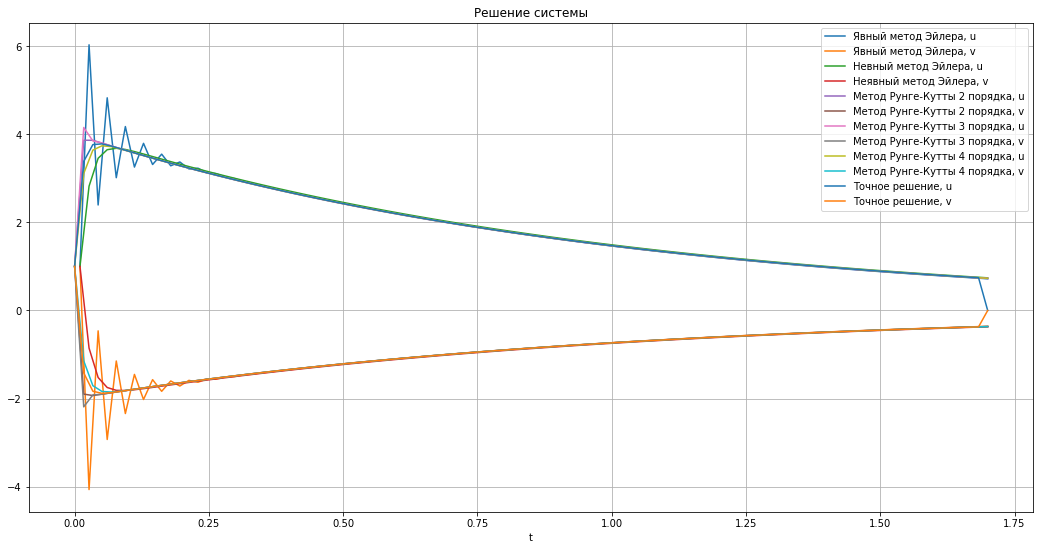

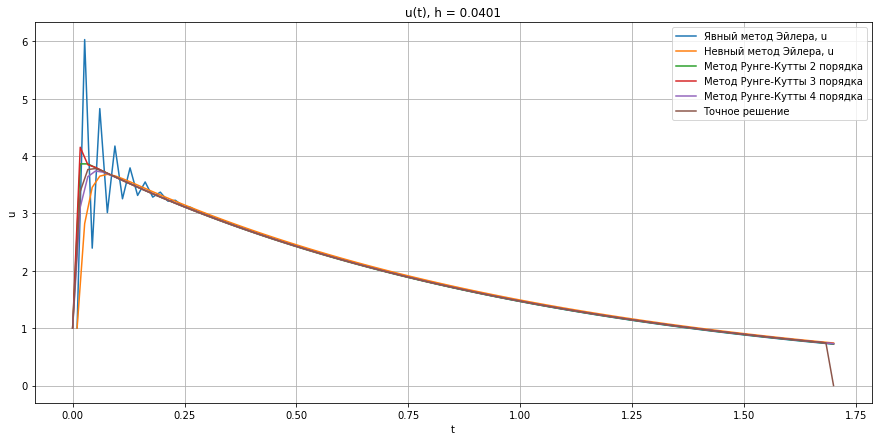

In [131]:
# Функции, задающие нашу систему
def f1(u, v):
    return 98 * u + 198 * v

def f2(u, v):
    return -99 * u - 199 * v

def f(t, u, v):
    return np.array([98 * u + 198 * v, -99 * u - 199 * v])

def Phi(x, u, v, h):
    return [x[0] - h*(98*x[0] + 198*x[1]) - u,
         x[1] - h*(-99*x[0]-199*x[1]) - v]

# Точное решение
def exact(n, h):
    t = np.linspace(0, n*h , n+1)
    u = np.zeros(n+1)
    v = np.zeros(n+1)
    for i in range(n):
        u[i] = -3*np.exp(-100*t[i])+4*np.exp(-t[i])
        v[i] = 3*np.exp(-100*t[i])-2*np.exp(-t[i])
    return t, u, v

# n - количество итераций, h - шаг, (0, u0, v0) - начальная точка
n, h = 100, 0.017
u0, v0 = 1, 1
t, u, v = exact(n, h)
te1, ue1, ve1 = euler1(n, h, u0, v0)
te2, ue2, ve2 = euler2(n, h, u0, v0)
t2, u2, v2 = RK2(n, h, u0, v0)
t3, u3, v3 = RK3(n, h, u0, v0)
t4, u4, v4 = RK4(n, h, u0, v0)


plt.figure(figsize=(18, 9))
plt.xlabel("t")
plt.plot(te1, ue1, label="Явный метод Эйлера, u")
plt.plot(te1, ve1, label="Явный метод Эйлера, v")
plt.plot(te2, ue2, label="Невный метод Эйлера, u")
plt.plot(te2, ve2, label="Неявный метод Эйлера, v")
plt.plot(t2, u2, label="Метод Рунге-Кутты 2 порядка, u")
plt.plot(t2, v2, label="Метод Рунге-Кутты 2 порядка, v")
plt.plot(t3, u3, label="Метод Рунге-Кутты 3 порядка, u")
plt.plot(t3, v3, label="Метод Рунге-Кутты 3 порядка, v")
plt.plot(t4, u4, label="Метод Рунге-Кутты 4 порядка, u")
plt.plot(t4, v4, label="Метод Рунге-Кутты 4 порядка, v")
plt.plot(t, u, label="Точное решение, u")
plt.plot(t, v, label="Точное решение, v")
plt.title("Решение системы")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 7))
plt.xlabel("t")
plt.ylabel("u")
plt.plot(te1, ue1, label="Явный метод Эйлера, u")
plt.plot(te2, ue2, label="Невный метод Эйлера, u")
plt.plot(t2, u2, label="Метод Рунге-Кутты 2 порядка")
plt.plot(t3, u3, label="Метод Рунге-Кутты 3 порядка")
plt.plot(t4, u4, label="Метод Рунге-Кутты 4 порядка")
plt.plot(t, u, label="Точное решение")
plt.title("u(t), h = 0.0401")
plt.legend()
plt.grid()
plt.show()

### Устойчивость

$ \begin{cases}
   u' = 98u + 198v\\
   v' = -99u - 199v
 \end{cases}$, $u(0) = v(0) = 1.$
 
 
Найдем собственные значения матрицы системы: $\lambda_1 = -1$,  $\lambda_2 = -100$.

Точное решение системы: $ \begin{cases}
   u = -3 \cdot e^{-100t} + 4 \cdot e^{-t}\\
   v = 3 \cdot e^{-100t} - 2 \cdot e^{-t}
 \end{cases}$.


Оценим величину шага, для которой используемые методы будут устойчивыми:

1) $\textbf{Явный метод Эйлера}$

Условие устойчивости: $|1 + \lambda_i \cdot h| \leq 1, i = 1, 2.$

Получаем оценку для шага: $0 \leq h \leq 0.02$.

2) $\textbf{Неявный метод Эйлера}$

Условие устойчивости: $|\frac{1}{1 - \lambda_i \cdot h}| \leq 1, i = 1, 2.$

Оно выполяется для любого шага при отрицательных $\lambda$.

3) $\textbf{Метод Рунге-Кутты 2 порядка}$

$u_{n+1} = u_n + \frac{h}{2}(\lambda u_n + \lambda(u_n + h \lambda u_n)) = u_n (1 + h \lambda + \frac{h^2 \lambda^2}{2})$,

Метод устойчив, если $|1 + h \lambda + \frac{h^2 \lambda^2}{2}| < 1$ или $h \leq \frac{2}{|\lambda_i|}$. Таким образом, $h \leq 0.02$.

Для методов Рунге-Кутты 3 и 4 порядка проводим оценку аналогично оценке для метода Рунге-Кутты 2 порядка.

4) $\textbf{Метод Рунге-Кутты 3 порядка}$

Метод устойчив, если $|1 + h \lambda + \frac{h^2 \lambda^2}{2}+\frac{h^3 \lambda^3}{6}| < 1$, то есть $h \leq 0.025$.

5) $\textbf{Метод Рунге-Кутты 4 порядка}$

Метод устойчив, если $|1 + h \lambda + \frac{h^2 \lambda^2}{2}+\frac{h^3 \lambda^3}{6} + \frac{h^4 \lambda^4}{24}| < 1$, то есть $h \leq 0.0279$.

# Задача 2

C:\Users\Elizaveta Grishkova\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: RuntimeWarning: divide by zero encountered in log
No handles with labels found to put in legend.


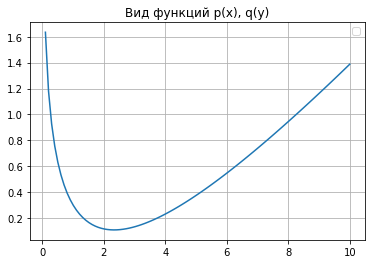

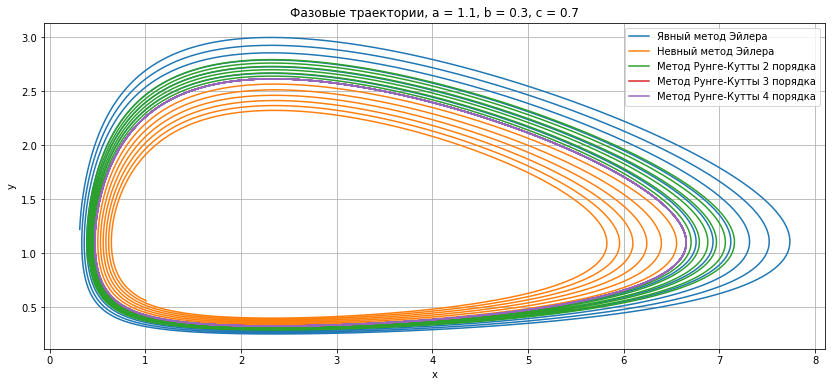

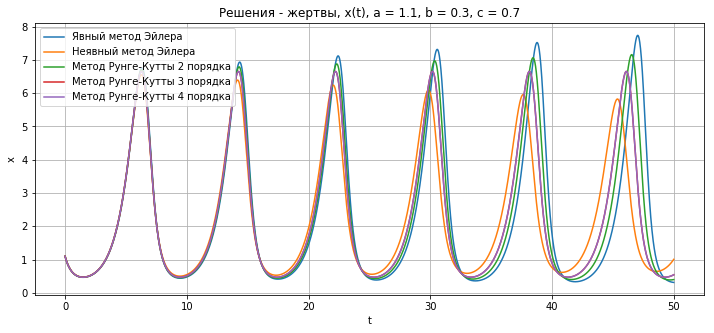

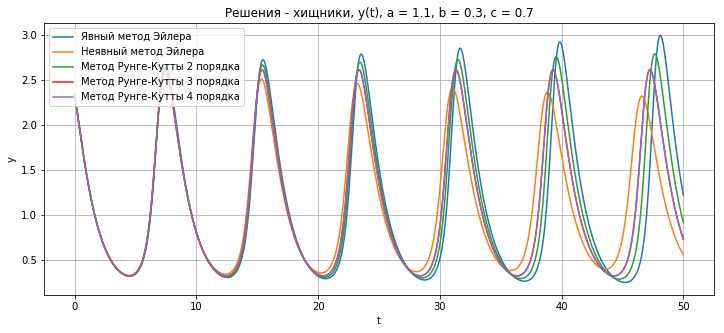

In [81]:
a, b, c = 1.1, 0.3, 0.7

# Функции, задающие нашу систему
def f1(x, y):
    return a * x - x * y

def f2(x, y):
    return b * x * y - c * y

def f(t, x, y):
    return np.array([a * x - x * y, b * x * y - c * y])


def ff(u, t):
    x, y = u
    return ([a * x - x * y, b * x * y - c * y])

def Phi(x, u, v, h):
    return [x[0] - h*(a*x[0] - x[0]*x[1]) - u,
         x[1] - h*(b*x[0]*x[1]-c*x[1]) - v]

n, h = 5000, 0.01
x0, y0 = 1.1, 7/3

t, u, v = euler1(n, h, x0, y0)
t1, u1, v1 = euler2(n, h, x0, y0)
t2, u2, v2 = RK2(n, h, x0, y0)
t3, u3, v3 = RK3(n, h, x0, y0)
t4, u4, v4 = RK4(n, h, x0, y0)

tt = np.linspace(0, n*h , n+1)
sol = odeint(ff, [x0, y0], tt, args=())
uu, vv = sol[:, 0], sol[:, 1]

s1 = odeint(ff, [x0, y0], tt, args=())
ut1, vt1 = s1[:, 0], s1[:, 1]


x = np.linspace(0, 10 , 100)
y = -c * np.log(x) + b*x

plt.figure(figsize=(6, 4))
plt.plot(x, y)
plt.title("Вид функций p(x), q(y)")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(14, 6))
plt.xlabel("x")
plt.ylabel("y")
plt.plot(u, v, label="Явный метод Эйлера")
plt.plot(u1, v1, label="Невный метод Эйлера")
plt.plot(u2, v2, label="Метод Рунге-Кутты 2 порядка")
plt.plot(u3, v3, label="Метод Рунге-Кутты 3 порядка")
plt.plot(u4, v4, label="Метод Рунге-Кутты 4 порядка")
plt.title("Фазовые траектории, a = 1.1, b = 0.3, c = 0.7")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.xlabel('t')
plt.ylabel('x')
plt.plot(t, u, label="Явный метод Эйлера")
plt.plot(t1, u1, label="Неявный метод Эйлера")
plt.plot(t2, u2, label="Метод Рунге-Кутты 2 порядка")
plt.plot(t3, u3, label="Метод Рунге-Кутты 3 порядка")
plt.plot(t4, u4, label="Метод Рунге-Кутты 4 порядка")
plt.title("Решения - жертвы, x(t), a = 1.1, b = 0.3, c = 0.7")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
plt.xlabel('t')
plt.ylabel('y')
plt.plot(t, v, label="Явный метод Эйлера")
plt.plot(t1, v1, label="Неявный метод Эйлера")
plt.plot(t2, v2, label="Метод Рунге-Кутты 2 порядка")
plt.plot(t3, v3, label="Метод Рунге-Кутты 3 порядка")
plt.plot(t4, v4, label="Метод Рунге-Кутты 4 порядка")
plt.title("Решения - хищники, y(t), a = 1.1, b = 0.3, c = 0.7")
plt.legend()
plt.grid()
plt.show()

$\begin{cases} x' = ax - xy\\ y' = bxy - cy \end{cases}$, $x_0 = x(0) > 0, y_0 = y(0) > 0$.

Определим вид точного решения системы. На фазовой плоскости ему соответствует кривая:

$\frac{dy}{dx} = - \frac{(bx-c)y}{x(a-y)}$.

Разделяя перменные, получаем:

$\int \frac{(a-y)}{y} dy = \int \frac{(bx-c)}{x} dx + C, C = const$.

или

$p(x) + q(y) = C$, где $p(x) = bx - c\ln x, q(y) = y - a \ln y $.

Первый интеграл системы: $y - a \ln y + bx - c \ln x= C, C = const.$

Найдем особые точки системы и определим их тип:

$\begin{cases} x' = ax - xy\\ y' = bxy - cy \end{cases}$, особые точки: $(0, 0)$ и $(\frac{c}{b}, a)$.

В окрестности точки $(0, 0)$ линеаризованная система имеет вид:

$\begin{cases} x' = ax\\ y' = -cy \end{cases}$, $\lambda_1 = a, \lambda_2 = -c$, значит тип особой точки - седло ($a$, $c$ $\in R$, $a$, $c > 0$).

Это неустойчивое положение равновесия.

В окрестности точки $(\frac{c}{b}, a)$ линеаризованная система имеет вид:

$\begin{cases} x' = -\frac{c}{b}x \\ y' = -aby \end{cases}$, $\lambda_{1, 2} = \pm i \sqrt{ac}$, значит тип особой точки - центр($a$, $c$ $\in R$, $a$, $c > 0$).

Такое положение равновесия является устойчивым по Ляпунову, но не асимптотически.


# Задача 3

$\begin{cases} 
x' = y \\
y' = x^2 - 1
\end{cases}$, 

C:\Users\Elizaveta Grishkova\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Elizaveta Grishkova\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in sqrt


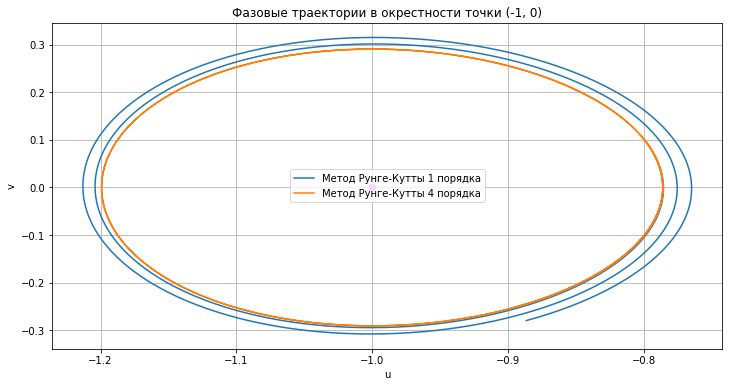

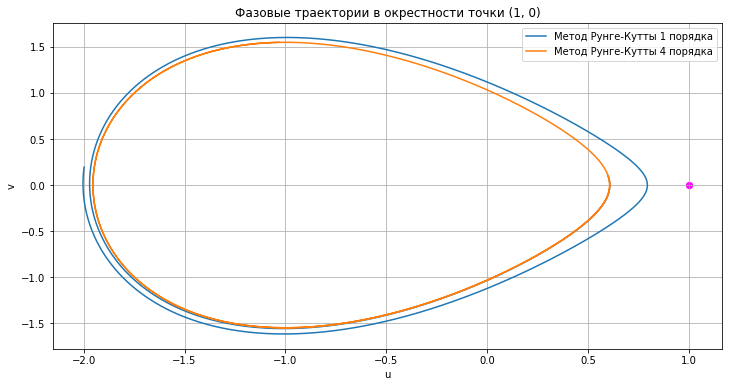

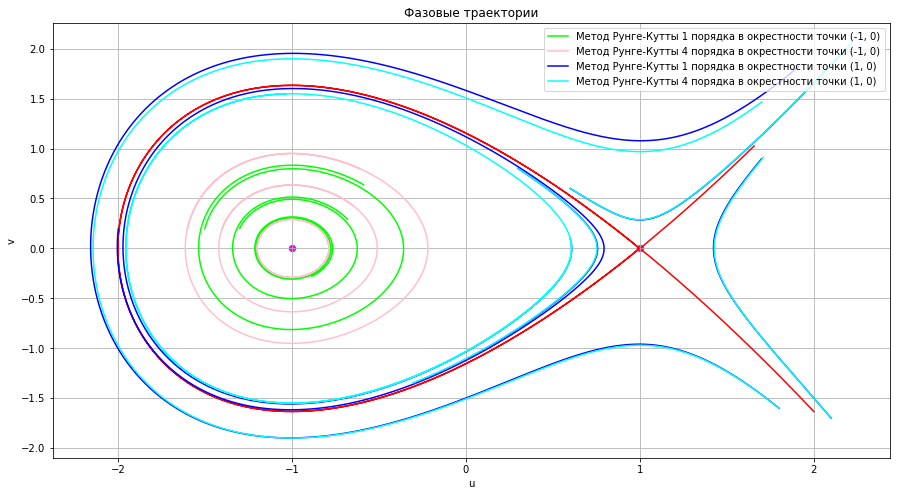

In [29]:
# Функция, задающая систему
def f(t, x, y):
    return np.array([y, x*x - 1])

n, h = 1000, 0.01
#(-1, 0)
t1, x1, y1 = RK1(n, h, -0.8, 0.1)
t4, x4, y4 = RK4(n, h, -0.8, 0.1)
t16, x16, y16 = RK1(600, h, -1.3, 0.2)
t46, x46, y46 = RK4(600, h, -1.4, 0.2)
t17, x17, y17 = RK1(600, h, -1.5, 0.2)
t47, x47, y47 = RK4(600, h, -1.6, 0.2)

#(1, 0)
t11, x11, y11 = RK1(n, h, 0.6, 0.1)
t41, x41, y41 = RK4(n, h, 0.6, 0.1)
t12, x12, y12 = RK1(600, h, 1.8, -1.6)
t42, x42, y42 = RK4(600, h, 1.8, -1.6)
t13, x13, y13 = RK1(170, h, 2.1, -1.7)
t43, x43, y43 = RK4(170, h, 2.1, -1.7)
t14, x14, y14 = RK1(270, h, 0.6, 0.6)
t44, x44, y44 = RK4(270, h, 0.6, 0.6)
t15, x15, y15 = RK1(320, h, 0.3, 0.8)
t45, x45, y45 = RK4(320, h, 0.3, 0.8)

#Сепаратриса
x = np.linspace(-4, 2, 1000)
ys1 = np.sqrt(2/3*x*x*x - 2*x + 4/3)
ys2 = -np.sqrt(2/3*x*x*x - 2*x + 4/3)
x0 = 2
y0 = -np.sqrt(2/3*x0*x0*x0 - 2*x0 + 4/3)
#Получаем сепаратрису методо Рунге-Кутты 4 порядка
st1, sx1, sy1 = RK4(25000, 0.001, 0.99, 0.01)
st2, sx2, sy2 = RK4(3000, 0.001, 1.01, 0.01)
st3, sx3, sy3 = RK4(3000, 0.001, x0, y0)

plt.figure(figsize=(12, 6))
plt.xlabel("u")
plt.ylabel("v")
plt.plot(x1, y1, label="Метод Рунге-Кутты 1 порядка")
plt.plot(x4, y4, label="Метод Рунге-Кутты 4 порядка")
plt.scatter(-1, 0, color='magenta', s=40, marker='o')
plt.title("Фазовые траектории в окрестности точки (-1, 0)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.xlabel("u")
plt.ylabel("v")
plt.plot(x11, y11, label="Метод Рунге-Кутты 1 порядка")
plt.plot(x41, y41, label="Метод Рунге-Кутты 4 порядка")
plt.scatter(1, 0, color='magenta', s=40, marker='o')
plt.title("Фазовые траектории в окрестности точки (1, 0)")
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(15, 8))
plt.xlabel("u")
plt.ylabel("v")
#plt.plot(x, ys1, color = 'red')
#plt.plot(x, ys2, color = 'red')
plt.plot(sx1, sy1, color = 'red')
plt.plot(sx2, sy2, color = 'red') 
plt.plot(sx3, sy3, color = 'red')
plt.plot(x1, y1, label="Метод Рунге-Кутты 1 порядка в окрестности точки (-1, 0)", color = 'lime')
plt.plot(x4, y4, label="Метод Рунге-Кутты 4 порядка в окрестности точки (-1, 0)", color = 'pink')
plt.plot(x16, y16, color = 'lime')
plt.plot(x46, y46, color = 'pink')
plt.plot(x17, y17, color = 'lime')
plt.plot(x47, y47, color = 'pink')
plt.plot(x11, y11, label="Метод Рунге-Кутты 1 порядка в окрестности точки (1, 0)", color = 'blue')
plt.plot(x41, y41, label="Метод Рунге-Кутты 4 порядка в окрестности точки (1, 0)", color = 'cyan')
plt.plot(x12, y12, color = 'blue')
plt.plot(x42, y42, color = 'cyan')
plt.plot(x13, y13, color = 'blue')
plt.plot(x43, y43, color = 'cyan')
plt.plot(x14, y14, color = 'blue')
plt.plot(x44, y44, color = 'cyan')
plt.plot(x15, y15, color = 'blue')
plt.plot(x45, y45, color = 'cyan')
plt.scatter((-1, 1), (0, 0), color='magenta', s=40, marker='o')
plt.title("Фазовые траектории")
plt.legend()
plt.grid()
plt.show()


По виду фазовых траекторий, полученных методами Рунге-Кутты 1 и 4 порядков, можно сделать вывод о типе особых точек: (-1, 0) - центр, (1, 0) - седло. Проверим это, линеаризовав систему в окрестности каждой точки:

$(1, 0)$

$ \begin{cases}
   x' = y\\
   y' = 2x
 \end{cases}$,   $\lambda = \pm \sqrt{2}$ - седло.

$(-1, 0)$

$ \begin{cases}
   x' = y\\
   y' = -2x
 \end{cases}$,   $\lambda = \pm i\sqrt{2}$ - центр.

Таким образом, численные методы решения ОДУ (при различных начальных точка, количеству шагов) позволяют качественно определить тип особых точек системы уравнений и получить фазовые траектории. 

Рассмотрим точку (1, 0). Собственные векторы системы:

$\vec{e_1} = \begin{pmatrix}
  \sqrt{2}\\
    2
\end{pmatrix}, \lambda_1 = \sqrt{2}$, 

$\vec{e_2} =\begin{pmatrix}
  \sqrt{2}\\
    -2
\end{pmatrix}, \lambda_2 = -\sqrt{2}$.

Уравнение сепаратрисы:
    
$\frac{y^2}{2} = \frac{x^3}{3} - 2x + \frac{2}{3}$.